In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise = 0.05)
dbscan = DBSCAN(eps = 0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [2]:
print(dbscan.core_sample_indices_[:10]) # the indexes of core samples -> the ones that are not outliers
print(len(dbscan.core_sample_indices_))

[ 0  1  2  3  4  7  8 10 13 14]
794


In [3]:
print(len(dbscan.components_)) # only the core components!

794


In [4]:
dbscan = DBSCAN(eps = 0.2, min_samples=5)

In [5]:
print(max(dbscan.fit_predict(X)))

1


In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [7]:
import numpy as np
X_new = np.array([[-0.5, 0], [0,0.5],[1, -0.1], [2,1]])
print(knn.predict(X_new))
print(knn.predict_proba(X_new))

[1 0 1 0]
[[0.16 0.84]
 [1.   0.  ]
 [0.16 0.84]
 [1.   0.  ]]


In [8]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=3)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
print(y_pred)

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]
 [-1 -1 -1]]


In [9]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=5, n_init=10)
gm.fit(X)

GaussianMixture(n_components=5, n_init=10)

In [10]:
gm.weights_

array([0.24971901, 0.1708909 , 0.25164495, 0.16736297, 0.16038218])

In [11]:
gm.means_

array([[ 0.35421142, -0.12277049],
       [-0.02005658,  0.95040642],
       [ 1.63706396, -0.13326274],
       [ 0.82773143,  0.47295539],
       [-0.83562183,  0.46124395]])

In [12]:
X.shape

(1000, 2)

In [13]:
gm.covariances_

array([[[ 0.09974149, -0.09075264],
        [-0.09075264,  0.10121056]],

       [[ 0.09341738,  0.00183327],
        [ 0.00183327,  0.00400261]],

       [[ 0.09610852,  0.08581421],
        [ 0.08581421,  0.09698997]],

       [[ 0.02636335, -0.03821978],
        [-0.03821978,  0.06791222]],

       [[ 0.02224108,  0.03400239],
        [ 0.03400239,  0.06524356]]])

In [14]:
print("converged", gm.converged_)
print("number of iterations", gm.n_init)

converged True
number of iterations 10


In [15]:
print(gm.predict(X)[:10])
print(gm.predict_proba(X)[:10])

[0 2 2 3 0 0 4 3 1 1]
[[1.00000000e+000 6.07656299e-016 1.15634181e-050 2.38505012e-036
  1.69329528e-032]
 [7.97086554e-043 1.94504599e-044 1.00000000e+000 4.71588698e-043
  0.00000000e+000]
 [2.97136190e-008 2.23643883e-110 9.96229373e-001 3.77059695e-003
  0.00000000e+000]
 [6.10521150e-018 1.47350311e-003 5.64924846e-035 9.98526497e-001
  3.25016206e-091]
 [1.00000000e+000 4.07220981e-039 1.33854461e-034 2.15929707e-041
  1.67430428e-058]
 [1.00000000e+000 7.16478192e-037 1.25846497e-038 5.95838920e-048
  2.61018778e-048]
 [3.16448050e-018 2.50556172e-050 1.21133763e-080 2.38189888e-196
  1.00000000e+000]
 [1.53544960e-008 4.62487937e-039 2.74758022e-010 9.99999984e-001
  6.20596453e-180]
 [2.96381546e-010 9.99999999e-001 7.02876704e-075 1.03293965e-009
  1.75463370e-020]
 [5.43862047e-003 5.94689902e-001 2.36856272e-109 6.74620480e-056
  3.99871477e-001]]


In [16]:
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[ 0.14064589  0.26933649]
 [-0.44717819  1.01693085]
 [ 0.65862805  0.96073295]
 [ 1.55031451 -0.25902256]
 [ 0.92974716  0.27142307]
 [-0.57479651  0.77930873]]
[0 1 1 2 3 4]


In [17]:
X[:6]

array([[-0.03890946,  0.40795804],
       [ 1.96228417,  0.18948814],
       [ 1.40827443, -0.40828534],
       [ 0.70044521,  0.77441904],
       [ 0.07839779,  0.11130546],
       [-0.00983885,  0.13197537]])

In [18]:
print(gm.score_samples(X)[:10])

[-1.65941669 -0.67553486 -0.49095153 -0.46928476 -0.47039454 -0.90276914
 -2.15028165 -0.96756701 -0.34304582 -0.63499814]


In [19]:
    densities = gm.score_samples(X)
    density_threshold = np.percentile(densities, 4)
    outliers = X[densities < density_threshold] # Slice list by boolian integers

In [20]:
outliers

array([[ 9.52885321e-01, -4.66029251e-01],
       [ 9.41614119e-01, -4.32225863e-01],
       [-9.26334363e-01,  3.30171266e-02],
       [ 1.07565018e+00,  3.38071898e-01],
       [-2.46833042e-02,  4.93251135e-01],
       [ 1.04949034e-03,  5.23465819e-01],
       [ 1.98170130e+00,  4.87463953e-01],
       [ 9.97786233e-01, -4.05025658e-01],
       [-8.67217842e-01,  5.92276596e-02],
       [-5.01522091e-01,  7.61039624e-01],
       [ 3.41443827e-01,  7.84685029e-01],
       [ 1.94523695e+00,  5.64521770e-01],
       [ 1.95166707e+00,  4.30207366e-01],
       [ 9.57988319e-01, -3.61873215e-03],
       [ 9.67423888e-03,  4.67164577e-01],
       [ 1.98554723e+00,  4.70836290e-01],
       [ 1.94387482e+00,  4.28522793e-01],
       [-9.70678788e-01,  5.20959006e-01],
       [ 5.98616816e-02,  4.48828446e-01],
       [ 8.37982770e-01,  5.13152885e-02],
       [ 3.52947903e-01,  8.00438362e-01],
       [ 1.97913840e+00,  4.67190964e-01],
       [ 1.20725791e-02,  5.19725002e-01],
       [ 1.

In [21]:
a = np.array([1,2,3,4])
print(a[[True, False, True, False]]) # this only works on numpy arrays!

[1 3]


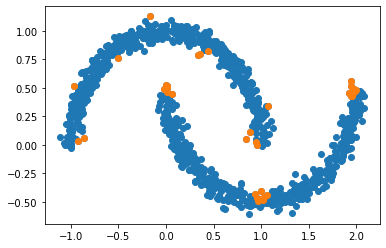

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.scatter(outliers[:,0], outliers[:, 1])

In [23]:
gm.bic(X)

1812.3767707878808

In [24]:
gm.aic(X)

1670.0518676973988

In [25]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init = 15)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.13, 0.13, 0.1 , 0.11, 0.11, 0.15, 0.15, 0.11, 0.  , 0.  ])